### Objective : To identify whether a patient has breast cancer or not.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Metadata of the dataset:

#### Title: Wisconsin Diagnostic Breast Cancer (WDBC)

Number of Instances: 699 (as of 15 July 1992)

Number of Attributes: 10 plus the class attribute

Attribute Information: (class attribute has been moved to last column)

   ##  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class:                        (2 for benign, 4 for malignant)

In [2]:
# importing the cancer dataset
df = pd.read_csv("Copy of breast-cancer-wisconsin-csv")
df.columns = ['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
print(df.shape)

# print the first 5 rows of the dataset
df.head()

NameError: name 'pd' is not defined

In [3]:
# to get a quick summary of the dataset
df.info()

NameError: name 'df' is not defined

There are no null values in the dataset.

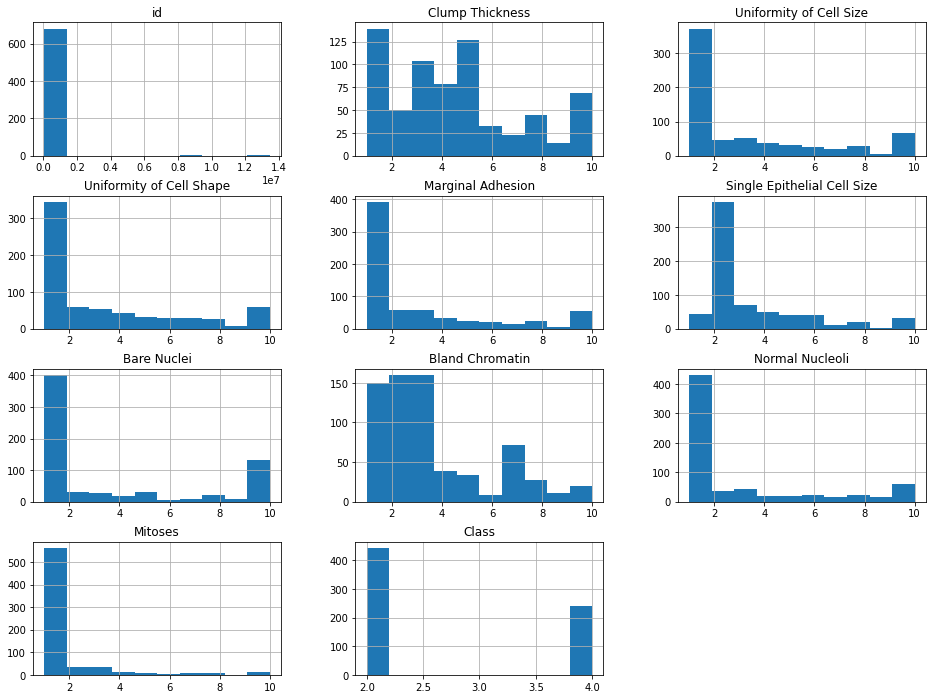

In [5]:
# checking the distribution of features
df.hist(bins=10, figsize=(16,12))
plt.show()

From the basic statistical values we can see that none of the variables follows a normal distribution, since none has mean 0 and standard deviation 1

In [6]:
# converting class into categorical so we can classify it.

from sklearn.preprocessing import LabelEncoder
df['Class'] = LabelEncoder().fit_transform(df['Class'])
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


### After converting the class variable to categorical, 0 means 'benign' and 1 means 'malignant'

<AxesSubplot:xlabel='Class', ylabel='count'>

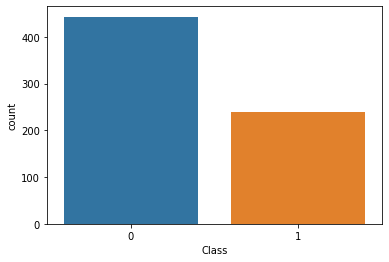

In [7]:
# checking if our response feature is balanced.
sns.countplot(df.Class)

Clearly, the class is not balanced.

In [8]:
# dropping id as it doesn't help in classifying
df.drop(['id'],axis = 1,inplace = True)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [9]:
#Splitting the predictor & response variables
X = df.drop(columns = ['Class'],axis =1)
y = df.Class

In [10]:
# Spliting of the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 42)

In [11]:
#Import svm model
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC()

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [12]:
# Evaluating the model
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9658536585365853


In [13]:
# creating a confusion matrix to evaluate the model
cm = confusion_matrix(y_test, y_pred)
cm

array([[134,   2],
       [  5,  64]], dtype=int64)

<AxesSubplot:>

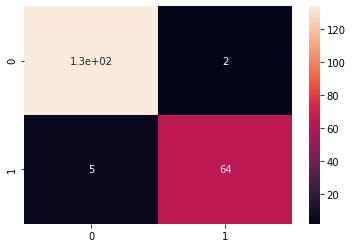

In [14]:
# using a heatmap to show confusion matrix
sns.heatmap(cm, annot=True)

In [15]:
# printing a classification report for model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       136
           1       0.97      0.93      0.95        69

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



Our model is 97% accurate.